<div class='alert alert-box alert-warning'>
    <b>I. Importing Libraries<b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

<div class='alert alert-box alert-warning'>
    <b>II. Importing Data<b>

In [2]:
df = pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- __Total__: 614 rows
- __Dtypes__: float64(4), int64(1), object(8)
- __Null values__: null values can be observed

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<u>__Null values__</u>   

    - Gender               13               object
    - Married              03               object
    - Dependents           15               object
    - Self_Employed        32               object
    - LoanAmount           22               float64
    - Loan_Amount_Term     14               float64
    - Credit_History       50               float64
    
    
- For `float64` columns, we will fill the null values using the __interpolation__ method, and for the columns with the `object` datatype, we'll use __mean/mode__ to do so.

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# let's look at all the unique values of the columns
for i in df:
    print ('Number of unique values:',df[i].nunique(),'\n',df[i].value_counts(),'\n','-'*50)

Number of unique values: 614 
 LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64 
 --------------------------------------------------
Number of unique values: 2 
 Male      489
Female    112
Name: Gender, dtype: int64 
 --------------------------------------------------
Number of unique values: 2 
 Yes    398
No     213
Name: Married, dtype: int64 
 --------------------------------------------------
Number of unique values: 4 
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 
 --------------------------------------------------
Number of unique values: 2 
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64 
 --------------------------------------------------
Number of unique values: 2 
 No     500
Yes     82
Name: Self_Employed, dtype: int64 
 --------------------------------------------------
Number of

<div class='alert alert-box alert-warning'>
    <b>III. Data Preprocessing<b>

In [7]:
# object ==> using fillforward
df['Gender'] = df['Gender'].fillna(method='ffill')
df['Dependents'] = df['Dependents'].fillna(method='ffill')
df['Married'] = df['Married'].fillna(method='ffill')
df['Self_Employed'] = df['Self_Employed'].fillna(method='ffill')

# float64 ==> using linear interpolation
df['LoanAmount'] = df['LoanAmount'].interpolate(method='linear')
df['LoanAmount'] = df['LoanAmount'].fillna(method='bfill') #because 1 null value still remains
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].interpolate(method='linear')
df['Credit_History'] = df['Credit_History'].interpolate(method='linear')

#dropping LoanID
df.drop('Loan_ID',axis=1,inplace=True)

<div class='alert alert-box alert-warning'>
    <b>IV. Data Visualization<b>

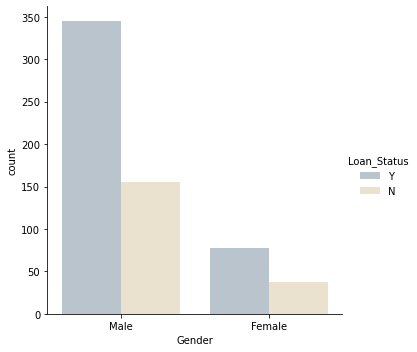

In [8]:
# plotting gender vs loan status
sns.catplot(x='Gender',hue='Loan_Status',data=df,kind='count',palette=['#B7C4CF','#EEE3CB','#D7C0AE','#967E76'])
plt.show()

__Observation__:
- This graph indicates that men are much more likely than women to have their loans approved. We can see that women are also more likely to have their loan applications approved than declined, though.
- Because there are more males in the dataset than females, there is a significant difference in the number of males and females. 

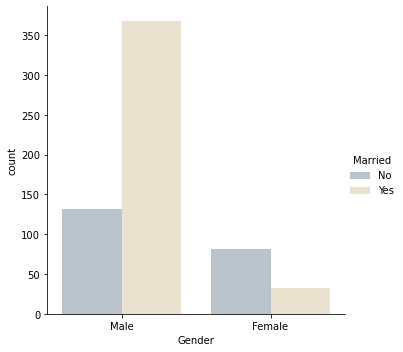

In [9]:
# plotting married vs gender
sns.catplot(x='Gender',hue='Married',data=df,kind='count',palette=['#B7C4CF','#EEE3CB','#D7C0AE','#967E76'])
plt.show()

__Observation__:
- Compared to women, more men are married.

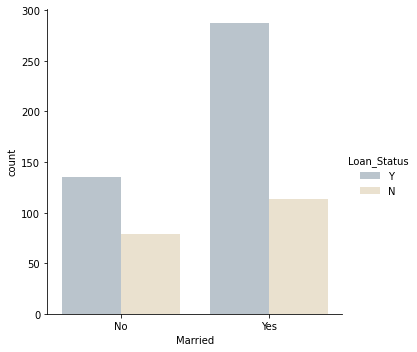

In [10]:
# plotting married vs loan status
sns.catplot(x='Married',hue='Loan_Status',data=df,kind='count',palette=['#B7C4CF','#EEE3CB','#D7C0AE','#967E76'])
plt.show()

__Observation__:
- Whether or not the applicant is married has no bearing on whether the loan will be approved.

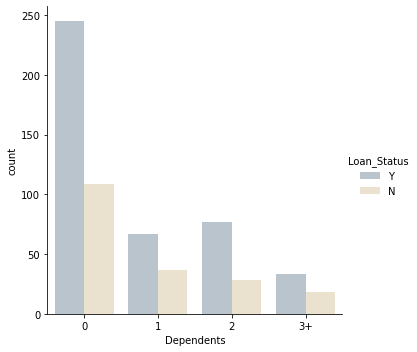

In [11]:
# cheking if the number of dependants affects the loan application status
sns.catplot(x='Dependents',hue='Loan_Status',data=df,kind='count',palette=['#B7C4CF','#EEE3CB','#D7C0AE','#967E76'])
plt.show()

__Observation__:
- As can be seen above, the application status is unaffected by the applicant's number of dependents.

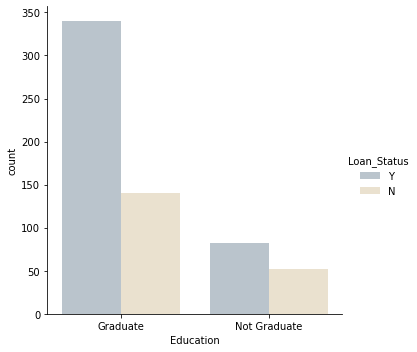

In [12]:
# checking if the education level affects the loan application status
sns.catplot(x='Education',hue='Loan_Status',data=df,kind='count',palette=['#B7C4CF','#EEE3CB','#D7C0AE','#967E76'])
plt.show()

__Observation__:
- The dataset has a greater number of "Graduates." But as we can see, the status of the loan application is unaffected by the applicant's educational background. Since both of them have a greater chance of having their loan approved

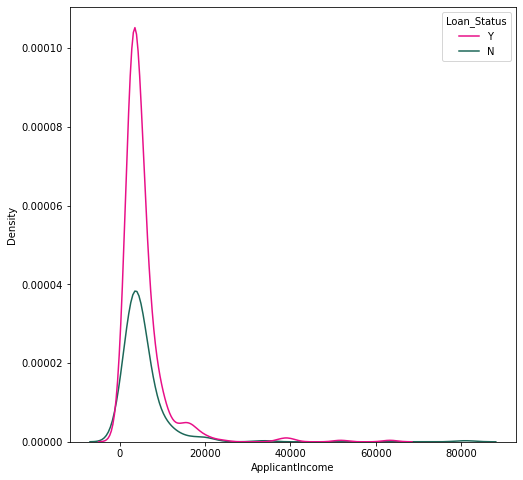

In [13]:
# checking if the applicant's income affects the loan application status
plt.figure(figsize=(8,8))
sns.kdeplot(data=df,x='ApplicantIncome',hue='Loan_Status',palette=['#E80F88','#1C6758'])
plt.show() 

__Observation__:
- Regardless of the applicant's income, there is a larger likelihood that the loan application will be approved overall.
- However, based on this plot, we can conclude with certainty that if the income is more than $65,000, the loan will be denied without a doubt.

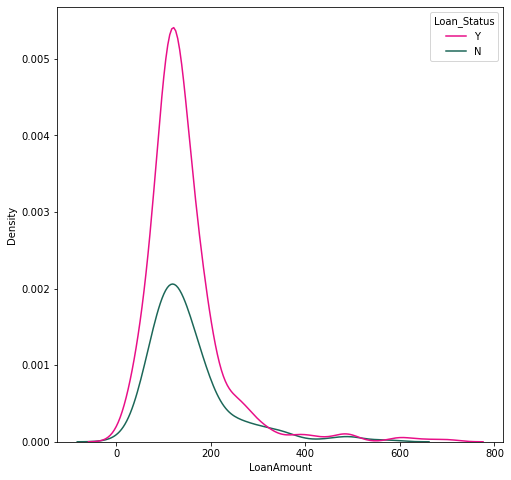

In [14]:
# checking if loan amount affects the loan application status 
plt.figure(figsize=(8,8))
sns.kdeplot(x='LoanAmount',hue='Loan_Status',data=df,palette=['#E80F88','#1C6758'])
plt.show()

__Observation__:
- The loan amount does not affect the status of the loan application, as can be seen above.

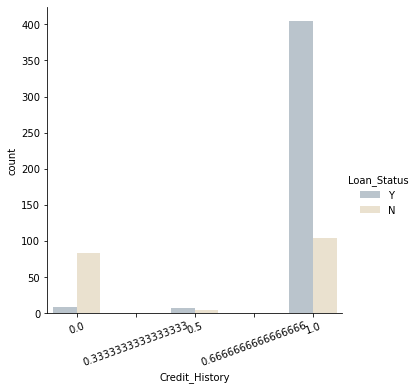

In [15]:
# plotting to check if credit history affects the loan application status
sns.catplot(x='Credit_History',hue='Loan_Status',data=df,kind='count',palette=['#B7C4CF','#EEE3CB','#D7C0AE','#967E76'])
plt.xticks(rotation='20')
plt.show()

__Observation__:
- The status of the loan application is impacted by the credit history.
- If the credit history is zero, there is a considerable likelihood that the loan application will be denied.
- There is a minor increase in the likelihood that the application will be accepted if the credit history is 0.5.
- If your credit history is 1, there is a very strong likelihood that your application will be accepted.

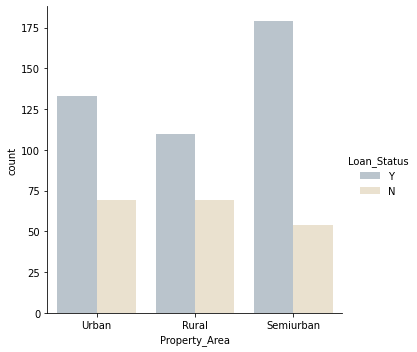

In [16]:
# checking if the applicant's property area affects the loan application status
sns.catplot(x='Property_Area',hue='Loan_Status',data=df,kind='count',palette=['#B7C4CF','#EEE3CB','#D7C0AE','#967E76'])
plt.show()

__Observation__:
- The applicant's loan application will be approved whether they reside in an urban, rural, or semi-urban location.

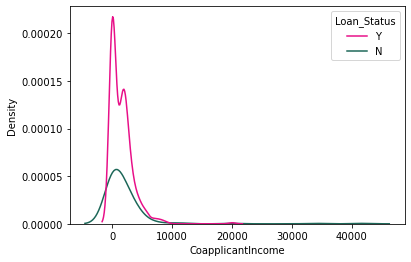

In [17]:
# plotting to check if the co-applicant's income plays a role in the loan application status outcome
sns.kdeplot(x='CoapplicantIncome',hue='Loan_Status',data=df,palette=['#E80F88','#1C6758'])
plt.show()

__Observation__:
- There is a high chance of the loan application being accepted regardless of the co-applicant's income

<div class='alert alert-box alert-warning'>
    <b>V. Label Encoding<b>

In [18]:
from sklearn.preprocessing import LabelEncoder
for i in df:
    if df[i].dtypes=='O':
        df[i] = LabelEncoder().fit_transform(df[i])

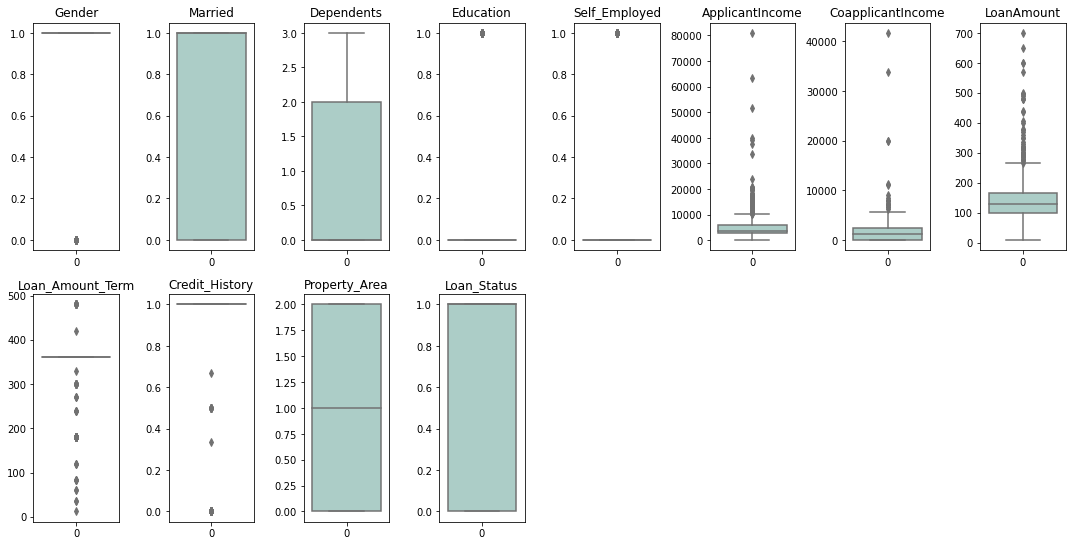

In [19]:
#looking for the outliers
collist = df.columns.values
nrows = 4
ncols = 8

plt.figure(figsize=(15,15))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data=df[collist[i]],orient='v',color='#A7D2CB')
    plt.title(collist[i])
    plt.tight_layout()

__Observation__:
- Outliers can be observed in the following 8 columns:

        - Gender
        - Education
        - Self-Employed
        - ApplicantIncome
        - Coapplicant Income
        - LoanAmount 
        - Loan_Amount_Term
        - Credit_History

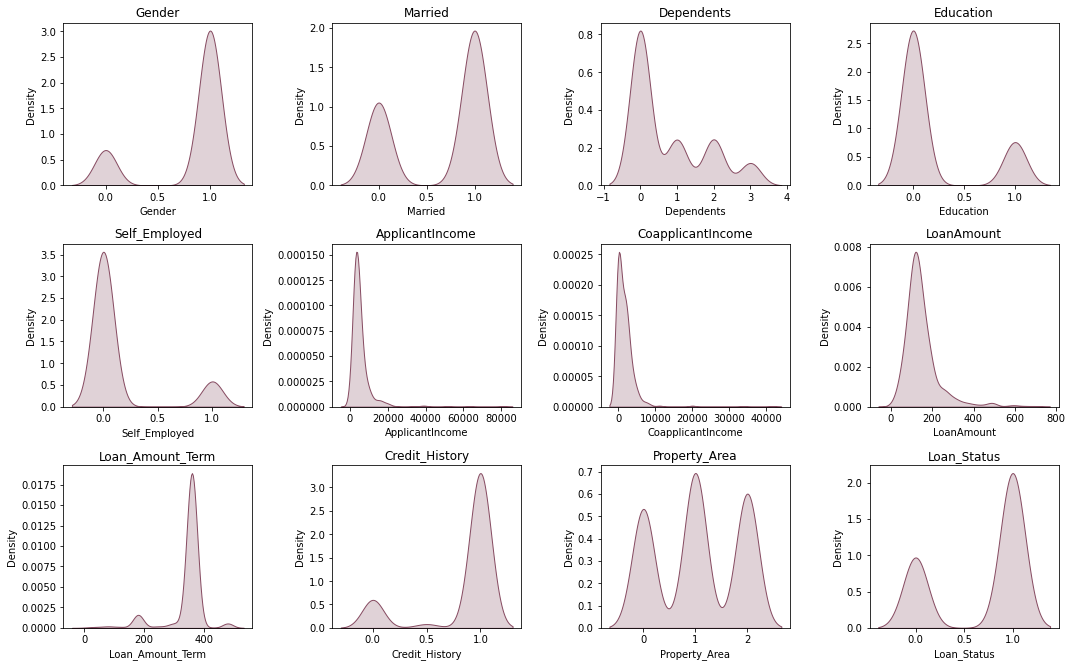

In [20]:
#checking the skewness of the data
collist = df.columns.values
nrows = 4
ncols = 4

plt.figure(figsize=(15,12))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.kdeplot(data=df[collist[i]],fill=True,color='#874C62')
    plt.title(collist[i])
    plt.tight_layout()

__Observation__:
- We can see that most of the columns are skewed

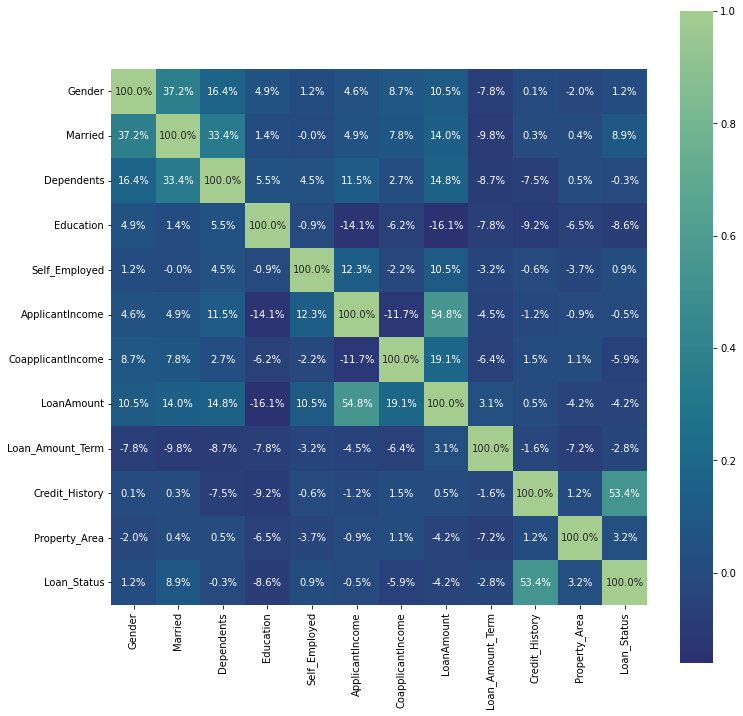

In [21]:
#plotting correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,fmt='.1%',square=True,cmap='crest_r')
plt.show()

__Observation__:
- _There is a high correlation between_ `LoanAmount` _and the_ `applicant's_ Income` 54.8%
- _There is a high correlation between_ `LoanStatus` _and the_ `applicant's_ CreditHistory` 53.4%

In [22]:
#checking multicollinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame({'Columns':df.columns,'VIF Factor':[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]})
vif

,Columns,VIF Factor
0,Gender,5.923340
1,Married,3.708908
2,Dependents,1.810547
3,Education,1.307587
4,Self_Employed,1.183227
5,ApplicantIncome,2.797982
6,CoapplicantIncome,1.485374
7,LoanAmount,6.468699
8,Loan_Amount_Term,9.923442
9,Credit_History,8.440488


__Observation__:
- Only `Loan_Amount_Term` can be seen to have a slightly higher VIF factor.

<div class='alert alert-box alert-warning'>
    <b>VI. Removing Outliers<b>

In [23]:
#removing outliers using zscore
from scipy.stats import zscore

z = np.abs(zscore(df))
df_new = df[(z<3).all(axis=1)]
print ("Data Loss (in %):",(df.shape[0]-df_new.shape[0])/df.shape[0]*100,'%')

Data Loss (in %): 6.026058631921824 %


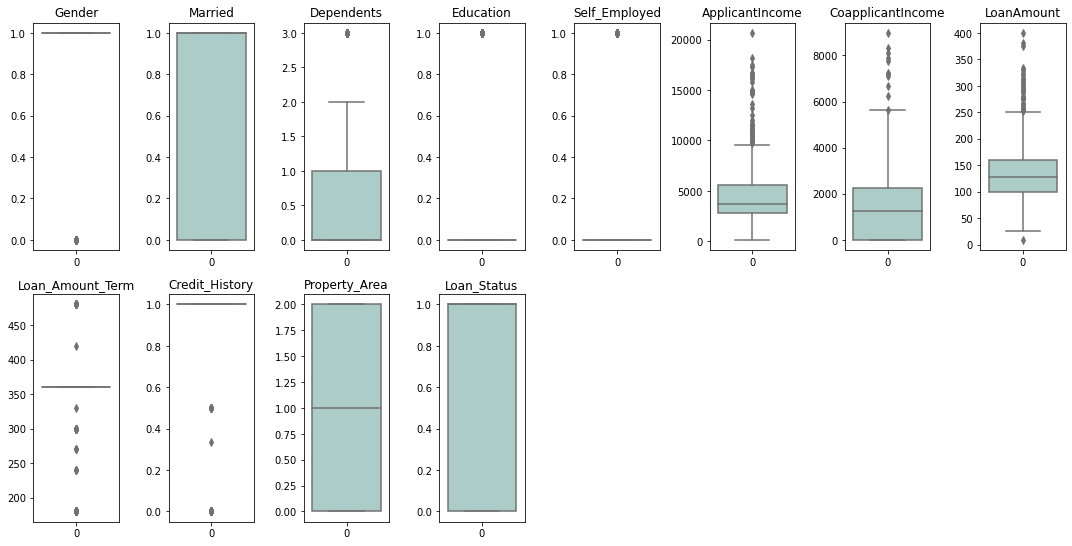

In [24]:
#looking for the outliers after appling zscore
collist = df_new.columns.values
nrows = 4
ncols = 8

plt.figure(figsize=(15,15))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data=df_new[collist[i]],orient='v',color='#A7D2CB')
    plt.title(collist[i])
    plt.tight_layout()

<div class='alert alert-box alert-warning'>
    <b>VII. Standardizing and Transforming the Independent Variables<b>

In [25]:
#splitting into X & Y
x = df_new.drop('Loan_Status',axis=1)
y = df_new['Loan_Status']

In [26]:
#scaling the data using StandardScalar and the transforming the data using power_transform
from sklearn.preprocessing import StandardScaler, power_transform

x = StandardScaler().fit_transform(x)
x = power_transform(x,method='yeo-johnson')

In [27]:
# checking the skewness 
x_df = pd.DataFrame(x)
x_df.skew()

0    -1.608201
1    -0.630211
2     0.493740
3     1.306588
4     2.139517
5     0.038413
6     0.265412
7    -0.047587
8     1.078840
9    -1.699490
10   -0.022129
dtype: float64

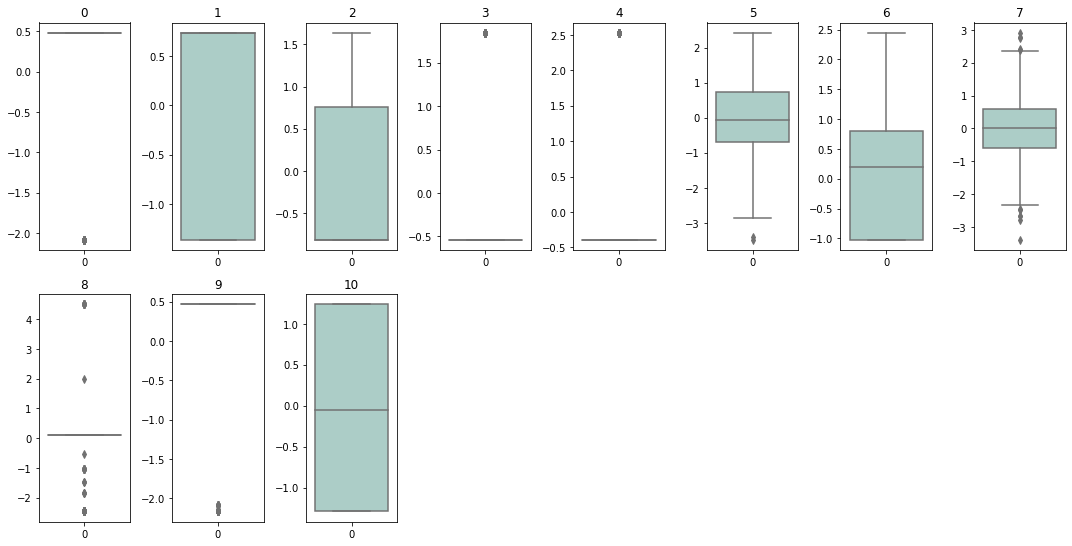

In [28]:
#looking for the outliers after appling zscore
collist = x_df.columns.values
nrows = 4
ncols = 8

plt.figure(figsize=(15,15))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data=x_df[collist[i]],orient='v',color='#A7D2CB')
    plt.title(collist[i])
    plt.tight_layout()

__Observation__:
- In comparison to earlier, the skewness has decreased and the number of outliers has marginally decreased. However, the outliers have not yet been fully addressed.

<div class='alert alert-box alert-warning'>
    <b>VIII. Applying SMOTE() to balance Loan_Status<b>

In [29]:
#checking values before SMOTE()
y.value_counts()

1    399
0    178
Name: Loan_Status, dtype: int64

In [30]:
from imblearn.over_sampling import SMOTE

x,y = SMOTE().fit_sample(x,y)

In [31]:
#values after SMOTE()
y.value_counts()

1    399
0    399
Name: Loan_Status, dtype: int64

<div class='alert alert-box alert-warning'>
    <b>IX. Model Creation<b>

In [32]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=8)

In [33]:
# making a function for roc_auc score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test,y_pred):
    y_test_new = LabelBinarizer().fit_transform(y_test)
    y_pred_new = LabelBinarizer().fit_transform(y_pred)
    return round(roc_auc_score(y_test_new,y_pred_new)*100,2)

In [52]:
# making a function for classification models
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

Model, score, f1, cross, roc_auc = [], [], [], [], []

def classification_model(model):
    Model.append(str(model).split("(")[0])
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    scoree = round(accuracy_score(y_test,y_pred)*100,2)
    score.append(scoree)
    
    f1_s = round(f1_score(y_test,y_pred,average='micro')*100,2)
    f1.append(f1_s)
    
    cross_v = cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    cross.append(cross_v)
    
    roc_ = multiclass_roc_auc_score(y_test,y_pred)
    roc_auc.append(roc_)
    
    print ("Model:",str(model).split("(")[0])
    print ("Accuracy Score:",scoree)
    print ("f1 Score:",f1_s)
    print ("CV Score:",cross_v)
    print ("ROC_AUC Score:",roc_)

#      shows the classification report
    class_report = classification_report(y_test,model.predict(x_test))
    print (class_report)
    
    
#     shows the confusion matrix
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,square=True)

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_para = {'penalty':['l1','l2','elasticnet','none'],'C':[1,10]}
gs_lr = GridSearchCV(lr,lr_para,cv=7,scoring='accuracy')
gs_lr.fit(x_train,y_train)
gs_lr.best_params_

{'C': 1, 'penalty': 'l2'}

Model: LogisticRegression
Accuracy Score: 75.0
f1 Score: 75.0
CV Score: 0.7243196202531645
ROC_AUC Score: 77.46
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        90
           1       0.64      0.97      0.77        70

    accuracy                           0.75       160
   macro avg       0.80      0.77      0.75       160
weighted avg       0.82      0.75      0.74       160



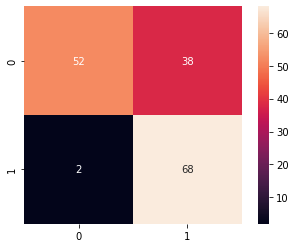

In [53]:
lr = LogisticRegression(penalty='l2',C=1)
classification_model(lr) 

In [37]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_para = {'criterion':['gini','entropy','log_loss'],'splitter':['best','random']}
gsCV_dtc = GridSearchCV(dtc,dtc_para,cv=3,scoring='accuracy')
gsCV_dtc.fit(x_train,y_train)
gsCV_dtc.best_params_

{'criterion': 'gini', 'splitter': 'best'}

Model: DecisionTreeClassifier
Accuracy Score: 80.0
f1 Score: 80.0
CV Score: 0.7734177215189874
ROC_AUC Score: 80.32
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        90
           1       0.74      0.83      0.78        70

    accuracy                           0.80       160
   macro avg       0.80      0.80      0.80       160
weighted avg       0.81      0.80      0.80       160



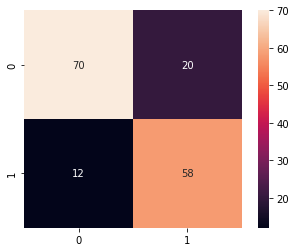

In [54]:
dtc = DecisionTreeClassifier(criterion='gini',splitter='best')
classification_model(dtc)

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_para = {'n_estimators':range(50,250,50),'criterion':['gini','entropy']}
gsCV_rfc = GridSearchCV(rfc,rfc_para,cv=3,scoring='accuracy')
gsCV_rfc.fit(x_train,y_train)
gsCV_rfc.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

Model: RandomForestClassifier
Accuracy Score: 89.38
f1 Score: 89.38
CV Score: 0.8460759493670885
ROC_AUC Score: 90.24
              precision    recall  f1-score   support

           0       0.97      0.83      0.90        90
           1       0.82      0.97      0.89        70

    accuracy                           0.89       160
   macro avg       0.90      0.90      0.89       160
weighted avg       0.91      0.89      0.89       160



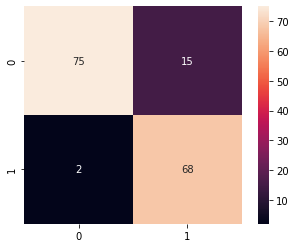

In [55]:
rfc = RandomForestClassifier(n_estimators=100,criterion='entropy')
classification_model(rfc)  

In [41]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc_para = {'n_estimators':range(50,300,50),'algorithm':['SAMME','SAMME.R']}
gs_abc = GridSearchCV(abc,abc_para,cv=3,scoring='accuracy')
gs_abc.fit(x_train,y_train)
gs_abc.best_params_

{'algorithm': 'SAMME', 'n_estimators': 200}

Model: AdaBoostClassifier
Accuracy Score: 80.0
f1 Score: 80.0
CV Score: 0.7858227848101266
ROC_AUC Score: 81.43
              precision    recall  f1-score   support

           0       0.93      0.70      0.80        90
           1       0.71      0.93      0.80        70

    accuracy                           0.80       160
   macro avg       0.82      0.81      0.80       160
weighted avg       0.83      0.80      0.80       160



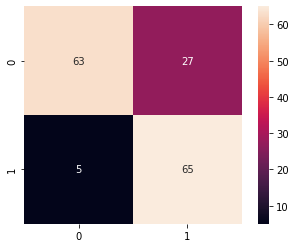

In [56]:
ada = AdaBoostClassifier(n_estimators=200,algorithm='SAMME')
classification_model(ada) 

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc_para = {'n_estimators':range(50,300,50),'loss':['log_loss','deviance','exponential'],
            'criterion':['friedman_mse','squared_error','mse']}
gs_gbc = GridSearchCV(gbc,gbc_para,cv=3,scoring='accuracy')
gs_gbc.fit(x_train,y_train)
gs_gbc.best_params_

{'criterion': 'friedman_mse', 'loss': 'exponential', 'n_estimators': 250}

Model: GradientBoostingClassifier
Accuracy Score: 80.62
f1 Score: 80.62
CV Score: 0.8110284810126581
ROC_AUC Score: 81.19
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        90
           1       0.74      0.86      0.79        70

    accuracy                           0.81       160
   macro avg       0.81      0.81      0.81       160
weighted avg       0.82      0.81      0.81       160



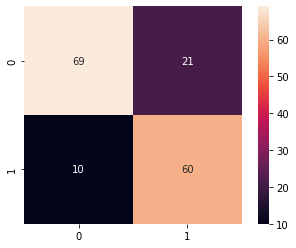

In [57]:
gbc = GradientBoostingClassifier(n_estimators=250,criterion='friedman_mse',loss='exponential')
classification_model(gbc) 

In [45]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()
bc_para = {'n_estimators':range(50,250,50)}
gsCV_bc = GridSearchCV(bc,bc_para,scoring='accuracy')
gsCV_bc.fit(x_train,y_train)
gsCV_bc.best_params_

{'n_estimators': 150}

Model: BaggingClassifier
Accuracy Score: 86.88
f1 Score: 86.88
CV Score: 0.8310443037974684
ROC_AUC Score: 87.7
              precision    recall  f1-score   support

           0       0.95      0.81      0.87        90
           1       0.80      0.94      0.86        70

    accuracy                           0.87       160
   macro avg       0.87      0.88      0.87       160
weighted avg       0.88      0.87      0.87       160



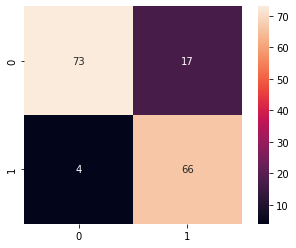

In [58]:
bc = BaggingClassifier(n_estimators=150)
classification_model(bc) 

In [47]:
from sklearn.svm import SVC
svc = SVC()
svc_para={'C':[1,10],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
gsCV_svc = GridSearchCV(svc,svc_para,cv=3,scoring='accuracy')
gsCV_svc.fit(x_train,y_train)
gsCV_svc.best_params_

{'C': 10, 'kernel': 'rbf'}

Model: SVC
Accuracy Score: 79.38
f1 Score: 79.38
CV Score: 0.7908069620253164
ROC_AUC Score: 79.76
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        90
           1       0.73      0.83      0.78        70

    accuracy                           0.79       160
   macro avg       0.79      0.80      0.79       160
weighted avg       0.80      0.79      0.79       160



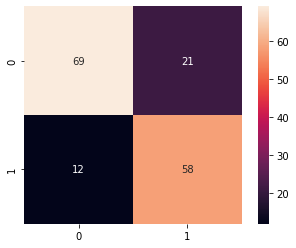

In [59]:
svc = SVC(kernel='rbf',C=10)
classification_model(svc)

In [60]:
classifier_models = pd.DataFrame({'Model Name':Model,'Accuracy Score':score,'F1 Score':f1,'CV Score':cross,'ROC_AUC Score':roc_auc})
classifier_models.sort_values(by='F1 Score',ascending=False)

,Model Name,Accuracy Score,F1 Score,CV Score,ROC_AUC Score
2,RandomForestClassifier,89.38,89.38,0.846076,90.24
5,BaggingClassifier,86.88,86.88,0.831044,87.70
4,GradientBoostingClassifier,80.62,80.62,0.811028,81.19
1,DecisionTreeClassifier,80.00,80.00,0.773418,80.32
3,AdaBoostClassifier,80.00,80.00,0.785823,81.43
6,SVC,79.38,79.38,0.790807,79.76
0,LogisticRegression,75.00,75.00,0.724320,77.46


__Observation__:
- `RandomForestClassifier` can be seen to have the highest accuracy, F1, CV and ROC_AUC Score. Therefore, we will chose that model for this dataset

<div class='alert alert-box alert-warning'>
    <b>X. Model Saving<b>

In [61]:
import joblib
from joblib import dump

joblib.dump(rfc,'RFC_Loan_Status_Prediction.pkl')

['RFC_Loan_Status_Prediction.pkl']